# Plot binned images

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from common import LATEST_DUMP_FILENAME

from allisbns.dataset import CodeDataset
from allisbns.isbn import (
    LAST_ISBN,
    MaskedISBN,
    get_prefix_bounds,
    get_prefix_capacity,
    normalize_isbn,
)
from allisbns.plotting import (
    BlockBinnedPlotter,
    RowBinnedPlotter,
    get_default_colormap,
    truncate_colormap,
    tweak_colormap,
)


%load_ext autoreload
%autoreload 2

## Load data

In [2]:
input_path = LATEST_DUMP_FILENAME
input_path

'aa_isbn13_codes_20251118T170842Z.benc.zst'

In [3]:
md5 = CodeDataset.from_file(LATEST_DUMP_FILENAME, "md5", fill_to_isbn=LAST_ISBN)
md5

CodeDataset(array([     6,      1,      9, ...,  91739,      1, 531099],
      shape=(14737376,)), bounds=(978000000000, 979999999999))

## Bin data

In [4]:
binned = md5.bin(bin_size=2500)
binned

BinnedArray(array([1148, 1210,  364, ...,    0,    0,    0],
      shape=(800000,), dtype=int32), bin_size=2500)

## Plot bins as binned image

In [5]:
figure_size = (12, 12)

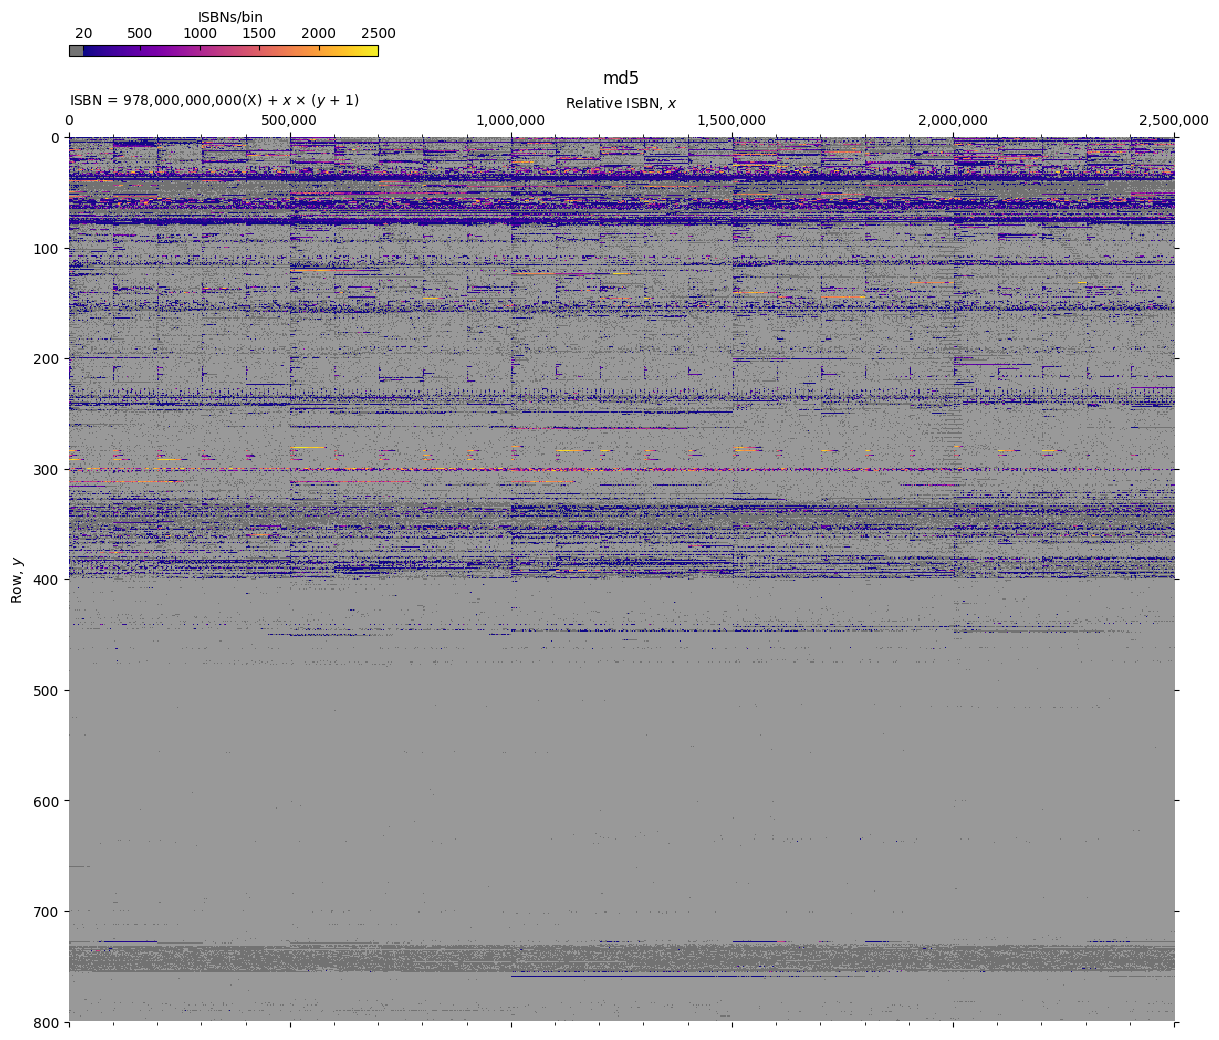

In [6]:
fig, ax = plt.subplots(figsize=figure_size)

plotter = RowBinnedPlotter(ax, bin_size=binned.bin_size, width=2.5e6)
plotter.plot_bins(binned)

plt.title("md5")

plt.tight_layout()
plt.show()

### Change colors

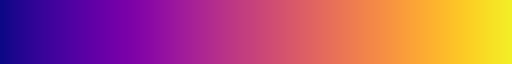

In [7]:
get_default_colormap()

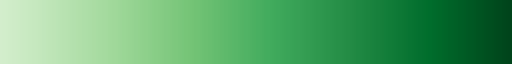

In [8]:
green_colormap = truncate_colormap(plt.colormaps["Greens"], 0.2, 1)
# Under values are controlled with the vmin parameter
green_colormap.set_under("wheat")
# Zero bins are converted to np.nan values
green_colormap.set_bad("0.96")
green_colormap

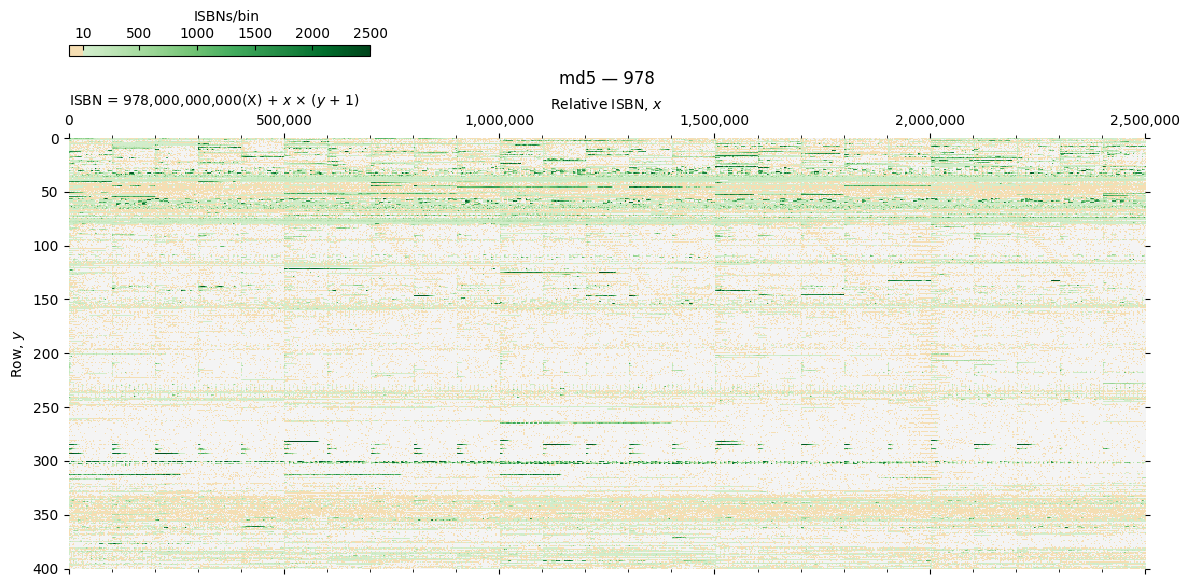

In [9]:
from allisbns.plotting import truncate_colormap


fig, ax = plt.subplots(1, 1, figsize=figure_size)

prefix = "978"
cropped = md5.crop(*get_prefix_bounds(prefix))
binned = cropped.bin(2500)

plotter = RowBinnedPlotter(ax, width=int(2.5e6), bin_size=binned.bin_size)

plotter.plot_bins(binned, colormap=green_colormap, vmin=10)

plt.title(f"md5 — {prefix}")

plt.tight_layout()
plt.show()

## Locate ISBN on image

In [10]:
some_isbn = normalize_isbn("978-2-36590-117X")
some_isbn

CanonicalISBN(978236590117X)

In [11]:
masked_isbn = MaskedISBN.from_canonical(some_isbn)
prefix = masked_isbn[:3]
prefix

'978-2-36590'

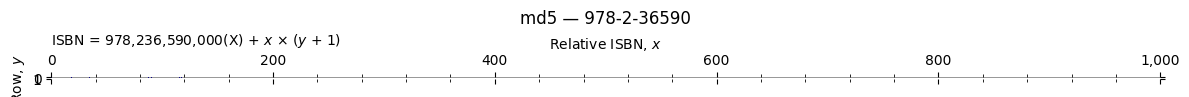

In [12]:
fig, ax = plt.subplots(figsize=figure_size)

cropped = md5.crop(*get_prefix_bounds(prefix))
binned = cropped.bin(1)

row_width = get_prefix_capacity(prefix)

# Let's try to use the default aspect (1 or "equal") first
plotter = RowBinnedPlotter(
    ax, width=row_width, bin_size=binned.bin_size, aspect=1, offset=cropped.offset
)

plotter.plot_bins(binned, show_colorbar=False)

plt.title(f"md5 — {prefix}")

plt.tight_layout()
plt.show()

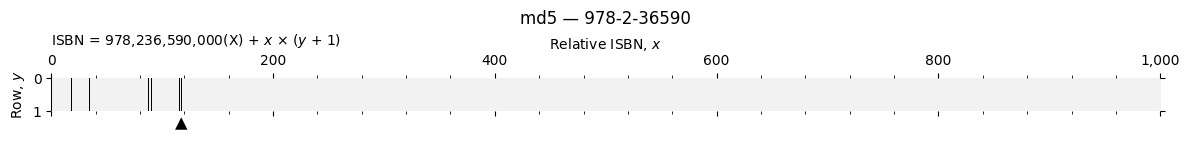

In [13]:
fig, ax = plt.subplots(figsize=figure_size)

# Set the aspect to more appropriate value
plotter = RowBinnedPlotter(
    ax, width=row_width, bin_size=binned.bin_size, aspect=30, offset=cropped.offset
)

# Create a custom colormap
black_and_gray_colormap = tweak_colormap(plt.colormaps["binary_r"], nan_color="0.95")

plotter.plot_bins(binned, colormap=black_and_gray_colormap, show_colorbar=False)

# Locate and annotate the ISBN
x, _ = plotter.coordinate_converter.isbn_to_xy(some_isbn.to_isbn12())
ax.annotate(
    r"$\blacktriangle$", xy=(x, 1), ha="center", va="top", size=18, clip_on=False
)

plt.title(f"md5 — {prefix}")

plt.tight_layout()
plt.show()

## Define extent without plotting image

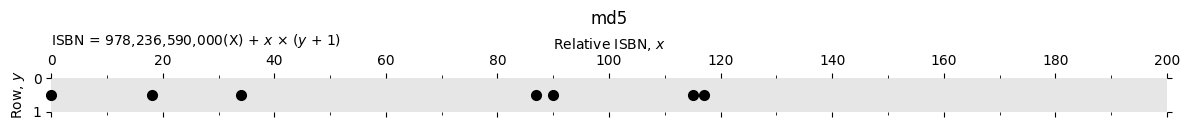

In [14]:
fig, ax = plt.subplots(figsize=figure_size)

plotter = RowBinnedPlotter(
    ax, bin_size=1, aspect=30 * 0.2, width=1000, offset=cropped.offset
)
plotter.define_extent(get_prefix_bounds(prefix)[1])

filled_isbns = cropped.get_filled_isbns()
for isbn in cropped.get_filled_isbns():
    x, y = plotter.coordinate_converter.isbn_to_xy(isbn)
    ax.scatter(x, y + 0.5, lw=2, c="k", marker="o", clip_on=False)

ax.set_facecolor("0.9")

# Limit the region of interest and adjust ticks
ax.set_xlim(0, 200)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

plt.title("md5")

plt.tight_layout()
plt.show()

## Plot bins as vertical blocks

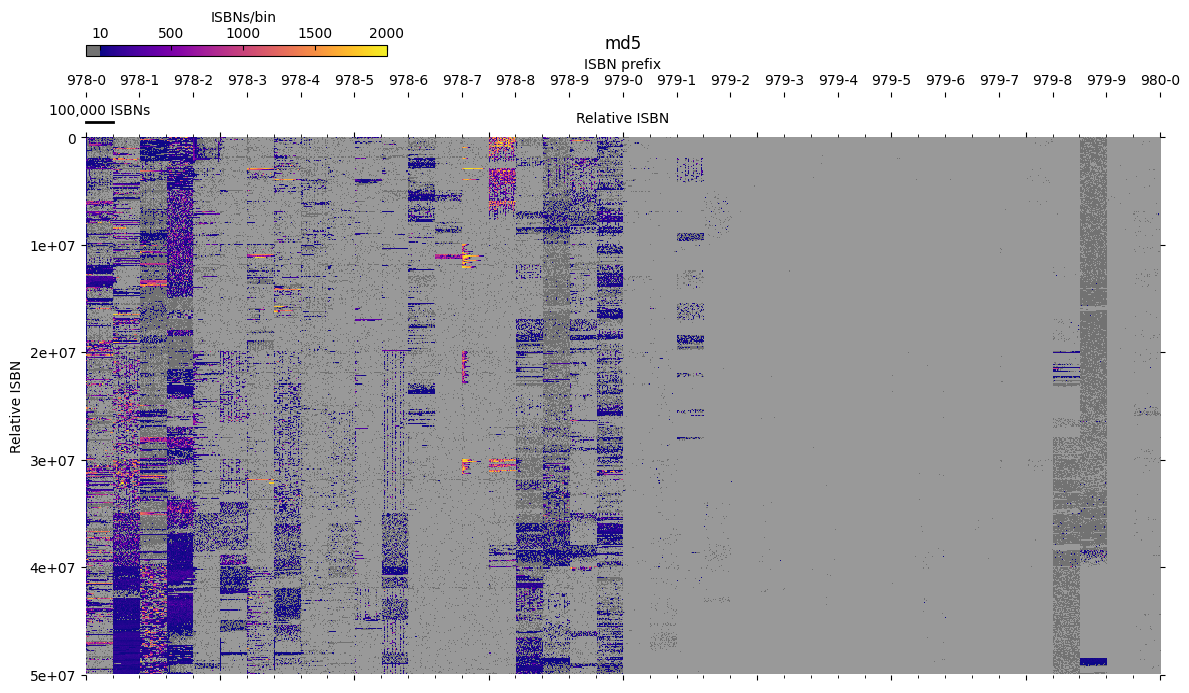

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

binned = md5.bin(2000)

plotter = BlockBinnedPlotter(ax, bin_size=binned.bin_size, aspect=2)
plotter.plot_bins(binned, vmin=10)

plt.title("md5")

plt.tight_layout()
plt.show()